# Programming Assignment 9

## AI statements required

AI statements are required for every task in this assignment. See instructions in Assignment 8 for the required statement content. 

## 1. Sea ice concentration

The NOAA Daily Optimum Interpolation Sea Surface Temperature (OISST) is a long term Climate Data Record that incorporates observations from different platforms (satellites, ships, buoys and Argo floats) into a regular global grid. The dataset is interpolated to fill gaps on the grid and create a spatially complete map of sea surface temperature and sea ice concentration. Satellite and ship observations are referenced to buoys to compensate for platform differences and sensor biases.

OISST is available and daily, weekly, and monthly time resolution. We will work with the monthly data in this task.  The sea ice concentration data are available through an OpenDAP server at this address: `http://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2/icec.mnmean.nc`

Open the dataset with xarray and recreate the following two maps. Figure 1 was created at a size of 4$\times$4 inches and Figure 2 was created at a size of 10$\times$4 in.

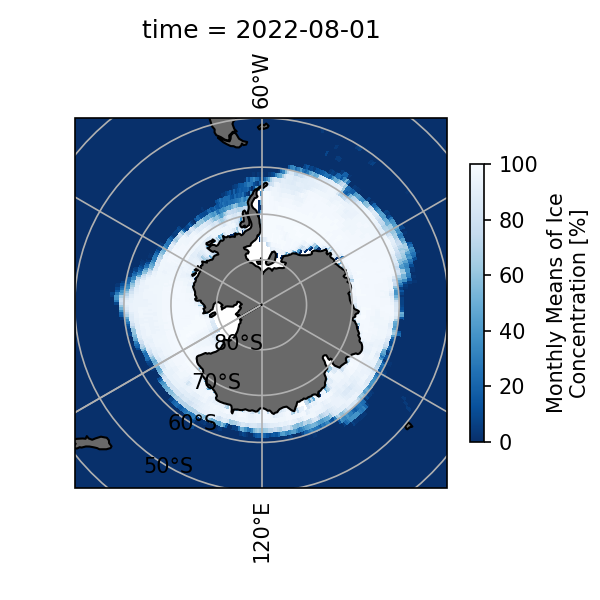


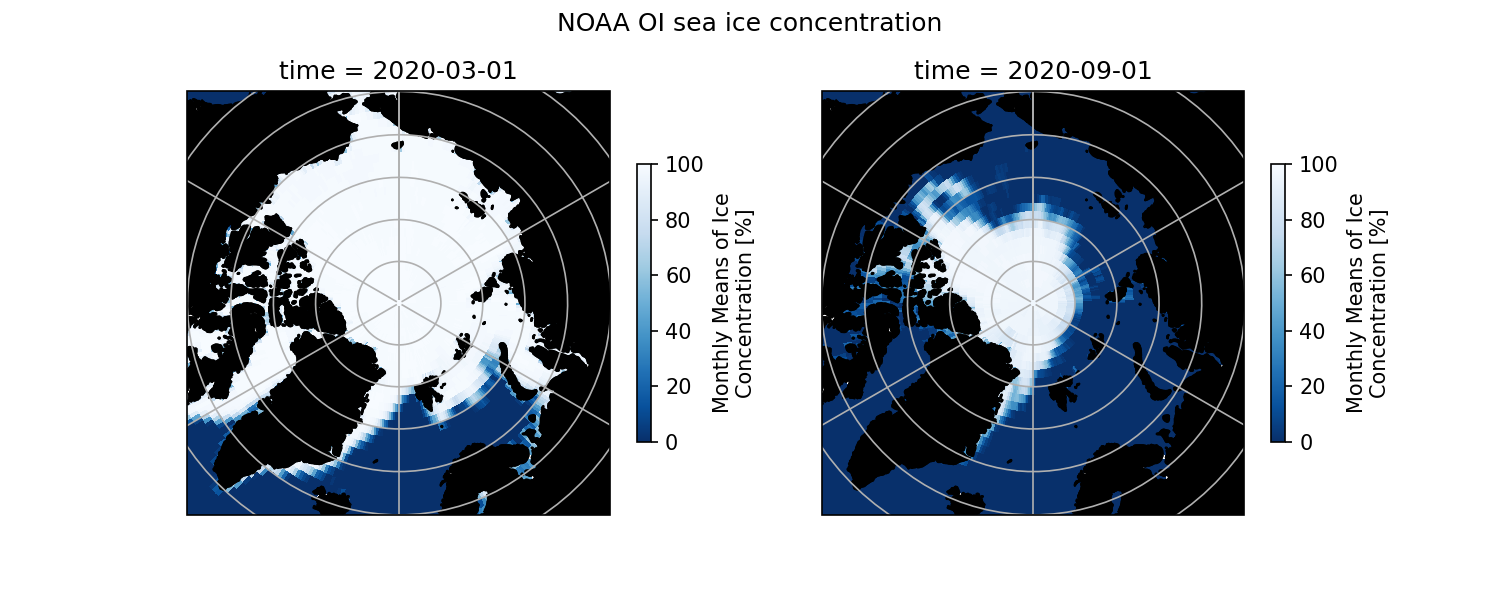


In [ ]:
# Write your code here

*Write your AI statement here*

## 2. Earthquakes

The file `lectures/datasets/usgs_earthquakes_2024.csv.gz` contains a USGS dataset of global earthquakes in 2024 (magnitude 4 and larger). We explored this file in pandas.ipynb. Read the dataset with pandas and use it to recreate this figure. (Set the figure size to 7x3 in.)

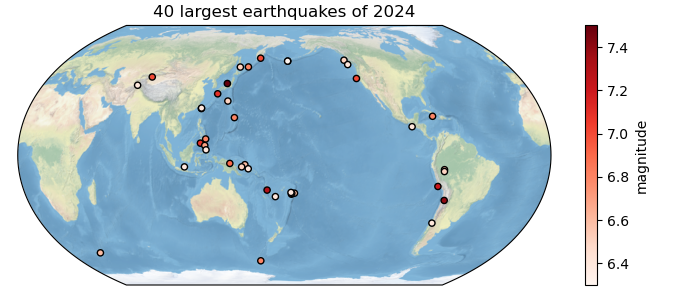

In [ ]:
# Write your code here

*Write your AI statement here*

## 3. North American Regional Reanalysis

The [North American Regional Reanalysis (NARR)](https://psl.noaa.gov/data/gridded/data.narr.html) is a widely used dataset for studying the weather and climate of North America. NARR is produced by the National Centers for Environmental Prediction (NCEP) and contains reanalyzed data for temperature, wind, moisture, soil, and dozens of other parameters. The dataset has a spatial resolution of 32 km, 29 vertical layers, and temporal resolution of 3 hours spanning 1979 through present. 

The goal of this task is to reproduce the following figure, which shows 500 hPa geopotential height contours (green) and precipitation (blue) on Jan 22, 2025, when it snowed in Tallahassee. (Contour label text does not need to be in the same locations or include units, but should have the same interval spacing as the example.)

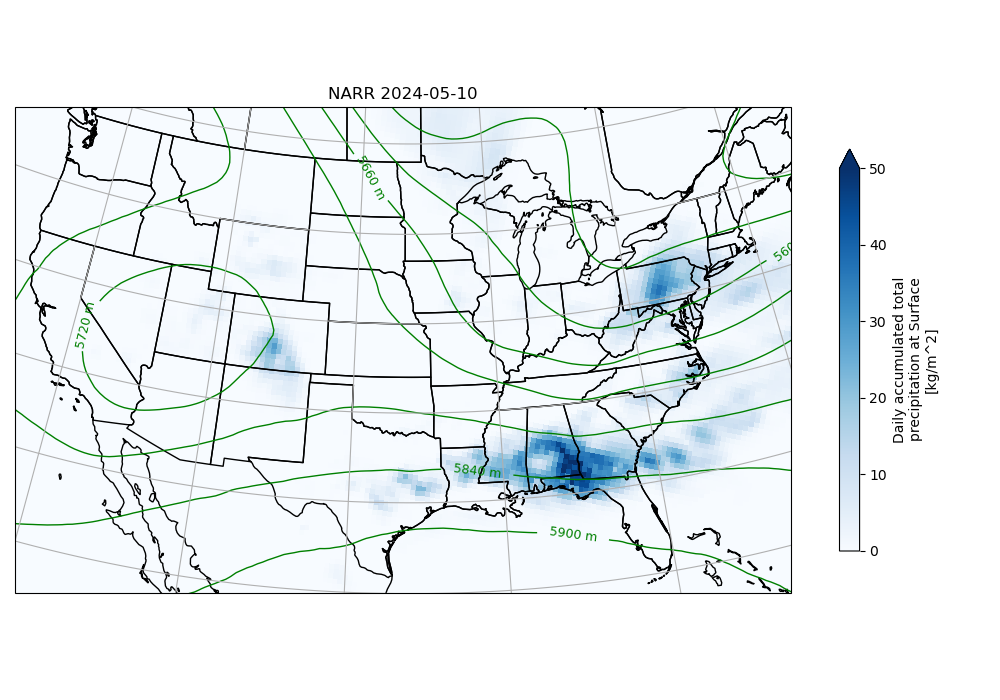

NARR data are available via OPeNDAP. The URL for accumulated daily precipitation is
`http://psl.noaa.gov/thredds/dodsC/Datasets/NARR/Dailies/monolevel/apcp.YYYY.nc`.
The URL for geopotential height is
`http://psl.noaa.gov/thredds/dodsC/Datasets/NARR/Dailies/pressure/hgt.YYYYMM.nc`. In both URLs, YYYY and MM should be replaced with the year and month of interest.

The longitude in these files has an abrupt jump from +180 to -180, which causes some plotting artifacts. It helps to make all of the longitudes have the same sign. To make all longitudes negative in a dataset, use  `ds['lon'] = ds['lon'] % 360 - 360`  


In [ ]:
# Write your code here

*Write your AI statement here*

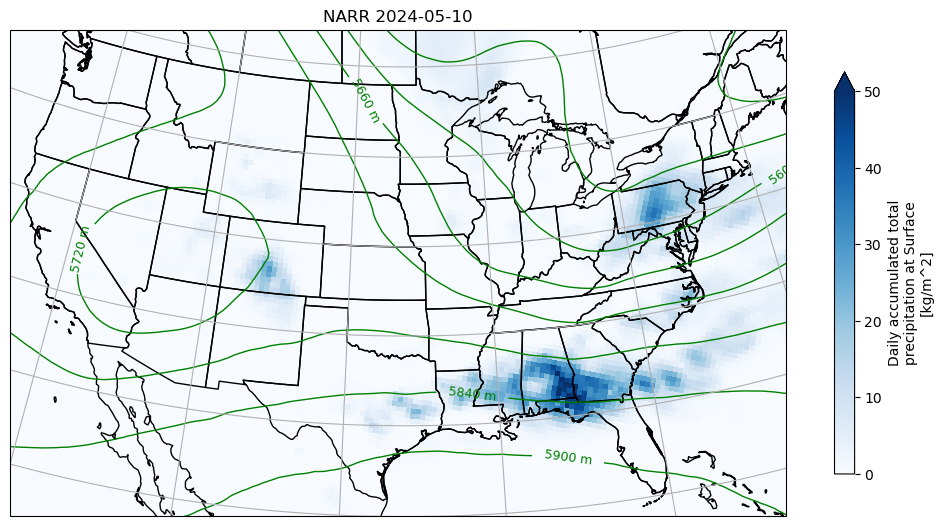

In [254]:
# Map projection; 
# central_longitude values of 90-100 should look ok
# central_latitude doesn't affect the appearance as much as longitude
mapproj = ccrs.LambertConformal(central_longitude=-96,
                                central_latitude=37.5)
fig, ax = plt.subplots(
    figsize=(10,7),
    subplot_kw={'projection':mapproj})

ax.set_extent( [-120,-73,25,50], ccrs.PlateCarree())
# ax.set_extent( [-105,-75,25,50], ccrs.PlateCarree())

precip['apcp'].sel(time=date)\
    .plot(x='lon',y='lat',
          ax=ax,
          transform=ccrs.PlateCarree(),
          cmap='Blues', vmax=50,
          cbar_kwargs={'shrink': 0.6})

c=hgt['hgt'].sel(time=date,level=500)\
    .plot.contour(x='lon',y='lat',
                 ax=ax,
                 colors='green',
                 linewidths=1,
                 levels=np.arange(5000,6000,60),
                 transform=ccrs.PlateCarree(),
                 )

# Add contour labels. The m units are optional
def fmt(x):
    '''Add 'm' units to contour labels'''
    return f'{x:.0f} m'
ax.clabel(c,c.levels,fontsize=9,fmt=fmt)

ax.add_feature(cfeature.STATES)
ax.coastlines()
ax.gridlines()
ax.set_title('NARR ' + str(date.date()))
fig.tight_layout()
fig.savefig('narr.png',dpi=100)

## 4. El Niño Southern Oscillation

The El Niño Southern Oscillation (ENSO) is the largest mode of interannual variability in Earth's ocean and atmosphere. During El Niño conditions, water in eastern equatorial Pacific Ocean, near the coast of South America, is warmer than usual and atmospheric deep convection shifts eastward over the Pacific Ocean. La Niña conditions bring cold water to the eastern Pacific and convection shifts westward. Both El Niño and La Niña affect weather patterns, espeically precipitation, around the globe.

In this task, you will reproduce the NINO3.4 index, which is one of the widely used measures of the strength of El Niño and La Niña events. To compute the index, average the SST in the NINO3.4 region (120-170°W, 5°S to 5°N, see figure), find the mean annual cycle of SST in this region, compute the SST anomalies, and smooth with a 3-month running mean. El Niño occurs when the NINO3.4 index exceeds +0.5 °C (i.e. more than 0.5°C above average SST). La Niña occurs withn the index is less than -0.5 °C.

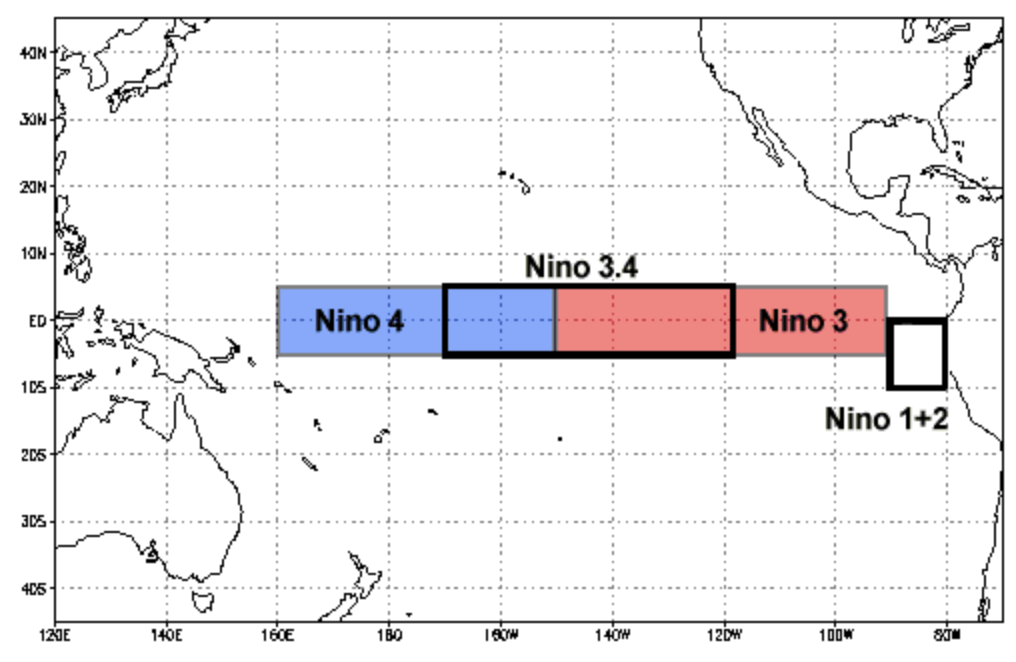

Use the NOAA OISST v2 dataset introduced in task 1. The SST data are available through OPeNDAP at `http://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2/sst.mnmean.nc`

Use your results to recreate the following two figures, which also serves to check your results.
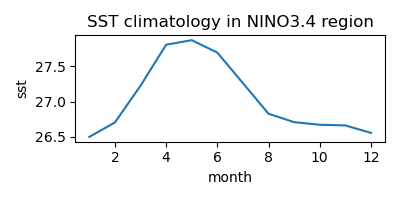

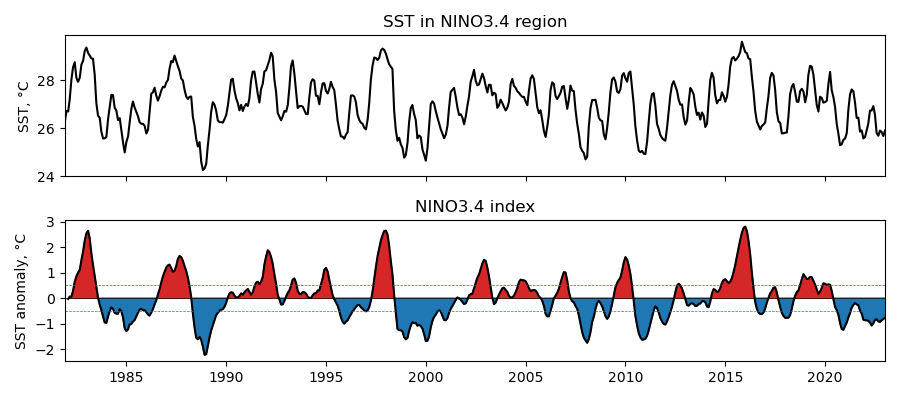


In [ ]:
# Write your code here

*Write your AI statement here*